### Regresi

In [6]:
import pandas as pd
dp = pd.read_csv('/content/employee_survey.csv')
dp.head()

,EmpID,Gender,Age,MaritalStatus,JobLevel,Experience,Dept,EmpType,WLB,WorkEnv,...,SleepHours,CommuteMode,CommuteDistance,NumCompanies,TeamSize,NumReports,EduLevel,haveOT,TrainingHoursPerYear,JobSatisfaction
0,6,Male,32,Married,Mid,7,IT,Full-Time,1,1,...,7.6,Car,20,3,12,0,Bachelor,True,33.5,5
1,11,Female,34,Married,Mid,12,Finance,Full-Time,1,1,...,7.9,Car,15,4,11,0,Bachelor,False,36.0,5
2,33,Female,23,Single,Intern/Fresher,1,Marketing,Full-Time,2,4,...,6.5,Motorbike,17,0,30,0,Bachelor,True,10.5,5
3,20,Female,29,Married,Junior,6,IT,Contract,2,2,...,7.5,Public Transport,13,2,9,0,Bachelor,True,23.0,5
4,28,Other,23,Single,Junior,1,Sales,Part-Time,3,1,...,4.9,Car,20,0,7,0,Bachelor,False,20.5,5


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from math import sqrt

# mengkodekan variabel kategoris
label_encoder = LabelEncoder()
for col in dp.select_dtypes(include='object').columns:
    dp[col] = label_encoder.fit_transform(dp[col])

# menentukan x dan y
X = dp.drop(columns=['JobSatisfaction'])
y = dp['JobSatisfaction']

# split dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Linear Regression R^2 Score: {:.2f}%".format(r2_score(y_test, y_pred_lr) * 100))
print("Linear Regression RMSE: {:.2f}".format(mean_squared_error(y_test, y_pred_lr, squared=False)))


Linear Regression R^2 Score: 27.95%
Linear Regression RMSE: 1.10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Neural Network

In [24]:
from sklearn.neural_network import MLPRegressor

nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)

print("Neural Network R^2 Score:{:.2f}%".format (r2_score(y_test, y_pred_nn) * 100))
print("Neural Network RMSE: {:.2f}".format(mean_squared_error(y_test, y_pred_nn, squared=False)))


Neural Network R^2 Score:59.91%
Neural Network RMSE:0.82


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(




```
# Ini diformat sebagai kode
```

#### Decision tree Regression

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, accuracy_score

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print(classification_report(y_test, y_pred_dt))
print("Decision Tree R^2 Score: {:.2f}%".format(r2_score(y_test, y_pred_dt) * 100))
print("Decision Tree RMSE: {:.2f}".format(mean_squared_error(y_test, y_pred_dt, squared=False)))



              precision    recall  f1-score   support

           1       0.61      0.61      0.61       134
           2       0.75      0.76      0.76        88
           3       0.65      0.69      0.67       163
           4       0.79      0.75      0.77       360
           5       0.71      0.74      0.73       163

    accuracy                           0.72       908
   macro avg       0.70      0.71      0.71       908
weighted avg       0.72      0.72      0.72       908

Decision Tree R^2 Score: 37.07%
Decision Tree RMSE: 1.03


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Lasso Regression

In [30]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0, random_state=42)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

print("Lasso Regression R^2 Score: {:.2f}%".format (r2_score(y_test, y_pred_lasso) * 100))
print("Lasso Regression RMSE: {:.2f}".format (mean_squared_error(y_test, y_pred_lasso, squared=False)))


Lasso Regression R^2 Score: 0.40%
Lasso Regression RMSE: 1.29


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Ridge Regression

In [31]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

print("Ridge Regression R^2 Score: {:.2f}%".format (r2_score(y_test, y_pred_ridge)* 100))
print("Ridge Regression RMSE: {:.2f}".format (mean_squared_error(y_test, y_pred_ridge,squared=False)))


Ridge Regression R^2 Score: 27.95%
Ridge Regression RMSE: 1.10


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Visualisasi Perbandingan Antar-Metode

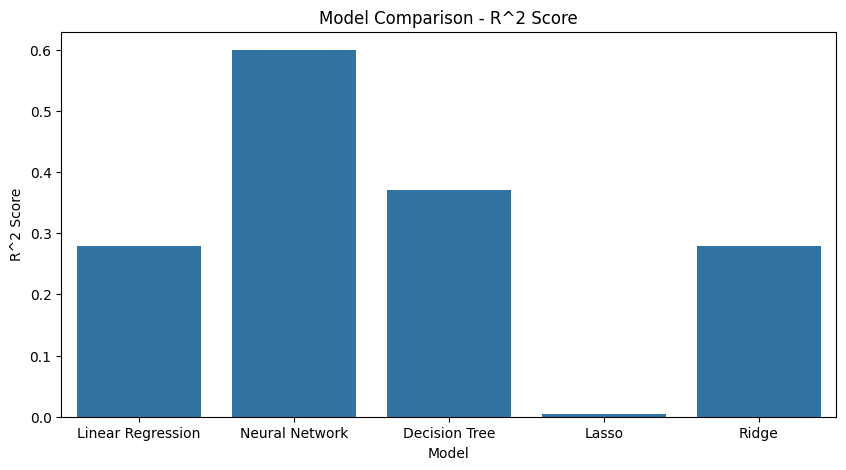

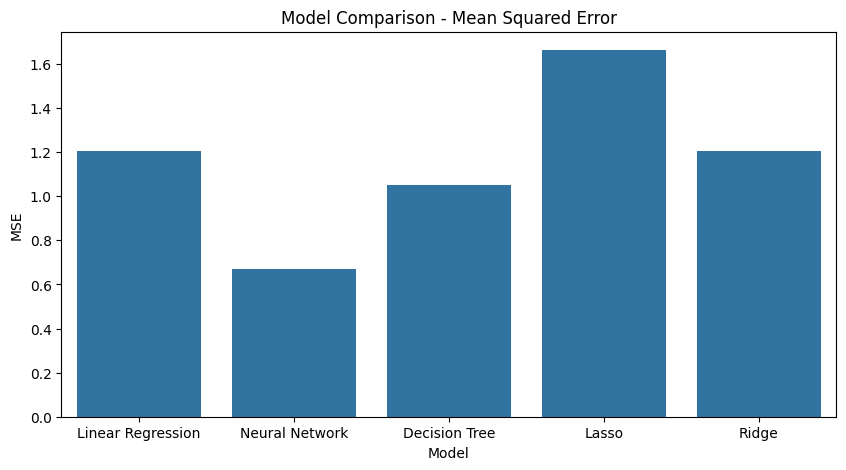

In [32]:
models = ['Linear Regression', 'Neural Network', 'Decision Tree', 'Lasso', 'Ridge']
r2_scores = [
    r2_score(y_test, y_pred_lr),
    r2_score(y_test, y_pred_nn),
    r2_score(y_test, y_pred_dt),
    r2_score(y_test, y_pred_lasso),
    r2_score(y_test, y_pred_ridge)
]

mse_scores = [
    mean_squared_error(y_test, y_pred_lr),
    mean_squared_error(y_test, y_pred_nn),
    mean_squared_error(y_test, y_pred_dt),
    mean_squared_error(y_test, y_pred_lasso),
    mean_squared_error(y_test, y_pred_ridge)

]

import matplotlib.pyplot as plt
import seaborn as sns

# Plot R^2 scores
plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=r2_scores)
plt.title('Model Comparison - R^2 Score')
plt.ylabel('R^2 Score')
plt.xlabel('Model')
plt.show()

# Plot MSE
plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=mse_scores)
plt.title('Model Comparison - Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('Model')
plt.show()


#### Kesimpulan

In [52]:
# Kesimpulan
from math import sqrt
rmse_scores = [sqrt(mse) for mse in mse_scores]

best_r2_model = models[r2_scores.index(max(r2_scores))]
best_rmse_model = models[rmse_scores.index(min(rmse_scores))]

print("Kesimpulan:")
print(f"Model dengan R² tertinggi adalah {best_r2_model} dengan skor {max(r2_scores) * 100:.2f}%.")
print(f"Model dengan RMSE terendah adalah {best_rmse_model} dengan nilai {min(rmse_scores):.2f}.")
if best_r2_model == best_rmse_model:
    print(f"Secara keseluruhan, model {best_r2_model} adalah yang paling akurat berdasarkan kedua metrik.")
else:
    print("Model terbaik berbeda untuk masing-masing metrik. Pilih model berdasarkan kebutuhan:")
    print(f" - Jika memprioritaskan variabilitas data yang dijelaskan, pilih {best_r2_model}.")
    print(f" - Jika memprioritaskan akurasi prediksi dalam satuan asli, pilih {best_rmse_model}.")

    print("Neural Network R^2 Score:{:.2f}%".format (r2_score(y_test, y_pred_nn) * 100))

Kesimpulan:
Model dengan R² tertinggi adalah Neural Network dengan skor 59.91%.
Model dengan RMSE terendah adalah Neural Network dengan nilai 0.82.
Secara keseluruhan, model Neural Network adalah yang paling akurat berdasarkan kedua metrik.


### Klasisfikasi

#### Naive bayes

In [75]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print(classification_report(y_test, y_pred_nb))
print("Akurasi Naive Bayes : {:.2f}%".format(accuracy_score(y_test, y_pred_nb)* 100))


              precision    recall  f1-score   support

           1       0.86      0.62      0.72       134
           2       0.51      0.20      0.29        88
           3       0.42      0.39      0.41       163
           4       0.54      0.87      0.66       360
           5       0.62      0.15      0.24       163

    accuracy                           0.55       908
   macro avg       0.59      0.45      0.46       908
weighted avg       0.57      0.55      0.51       908

Akurasi Naive Bayes : 55.40%


#### Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print(classification_report(y_test, y_pred_dt))
print("Akurasi model Decision Tree: {:.2f}%".format(accuracy_score(y_test, y_pred_dt) * 100))


              precision    recall  f1-score   support

           1       0.60      0.58      0.59       134
           2       0.71      0.73      0.72        88
           3       0.67      0.72      0.70       163
           4       0.78      0.74      0.76       360
           5       0.66      0.68      0.67       163

    accuracy                           0.70       908
   macro avg       0.68      0.69      0.69       908
weighted avg       0.71      0.70      0.70       908

Akurasi model Decision Tree: 70.37%


#### Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_rf)* 100))


              precision    recall  f1-score   support

           1       0.82      0.61      0.70       134
           2       0.80      0.64      0.71        88
           3       0.82      0.71      0.76       163
           4       0.73      0.95      0.82       360
           5       0.82      0.62      0.71       163

    accuracy                           0.77       908
   macro avg       0.80      0.71      0.74       908
weighted avg       0.78      0.77      0.76       908

Random Forest Accuracy:76.87%


#### KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune 'n_neighbors'
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print(classification_report(y_test, y_pred_knn))
print("KNN Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_knn)* 100))


              precision    recall  f1-score   support

           1       0.31      0.20      0.24       134
           2       0.59      0.72      0.65        88
           3       0.46      0.45      0.46       163
           4       0.67      0.79      0.72       360
           5       0.78      0.61      0.68       163

    accuracy                           0.60       908
   macro avg       0.56      0.55      0.55       908
weighted avg       0.59      0.60      0.59       908

KNN Accuracy: 60.35%


#### Visualisasi Perbandingan Antar-Metode

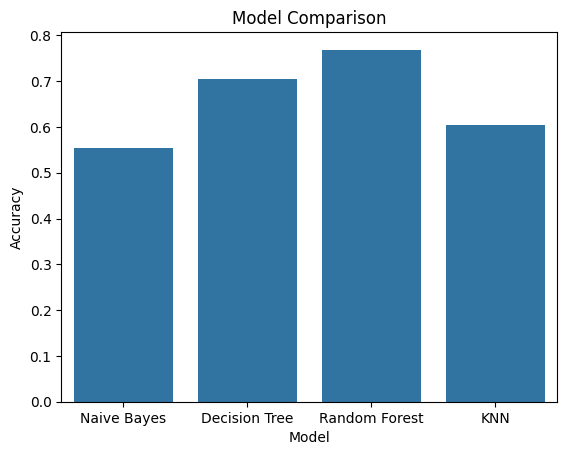

In [72]:
models = ['Naive Bayes', 'Decision Tree', 'Random Forest', 'KNN']
accuracies = [
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_knn),
]

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()


#### Kesimpulan

In [74]:
# Kesimpulan
best_model = models[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)

print("Kesimpulan:")
print(f"Model dengan akurasi tertinggi adalah {best_model} dengan nilai akurasi {best_accuracy * 100:.2f}%.")


Kesimpulan:
Model dengan akurasi tertinggi adalah Random Forest dengan nilai akurasi 76.87%.


Uji Model


In [78]:
print("Kesimpulan:")
print("Dari metode supervised learning yaitu regressi dan klasifikan metode yang paling cocok digunakan untuk memprediksi nilai y adalah dengan metode klasifikasi menggunakan model Random Forrest")

Kesimpulan:
Dari metode supervised learning yaitu regressi dan klasifikan metode yang paling cocok digunakan untuk memprediksi nilai y adalah dengan metode klasifikasi menggunakan model Random Forrest


In [86]:
new_data = pd.DataFrame({
    'EmpID': [9999],  # ID dummy
    'Gender': [1],  # Encoded 'Female'
    'Age': [28],
    'MaritalStatus': [0],  # Encoded 'Single'
    'JobLevel': [2],  # Encoded 'Mid'
    'Experience': [6],
    'Dept': [1],  # Encoded 'IT'
    'EmpType': [0],  # Encoded 'Full-Time'
    'WLB': [3],
    'WorkEnv': [4],
    'PhysicalActivityHours': [3.0],
    'Workload': [7],
    'Stress': [4],
    'SleepHours': [6.5],
    'CommuteMode': [2],  # Encoded 'Public Transport'
    'CommuteDistance': [15],
    'NumCompanies': [2],
    'TeamSize': [10],
    'NumReports': [1],
    'EduLevel': [2],  # Encoded 'Bachelor'
    'haveOT': [1],  # Encoded True
    'TrainingHoursPerYear': [25.0]
})


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_data_scaled = scaler.transform(new_data)
prediction = rf_model.predict(new_data_scaled)

print("Prediksi tingkat kepuasan kerja:", prediction)


Prediksi tingkat kepuasan kerja: [5]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
